# Affinity Propagation

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mall_data = pd.read_csv('./input/Mall_Customers.csv')
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
from sklearn.cluster import AffinityPropagation

Для кластеризації використовуються лише числові стовпці. Тому gender не будемо використовувати

In [5]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [9]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_

In [10]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


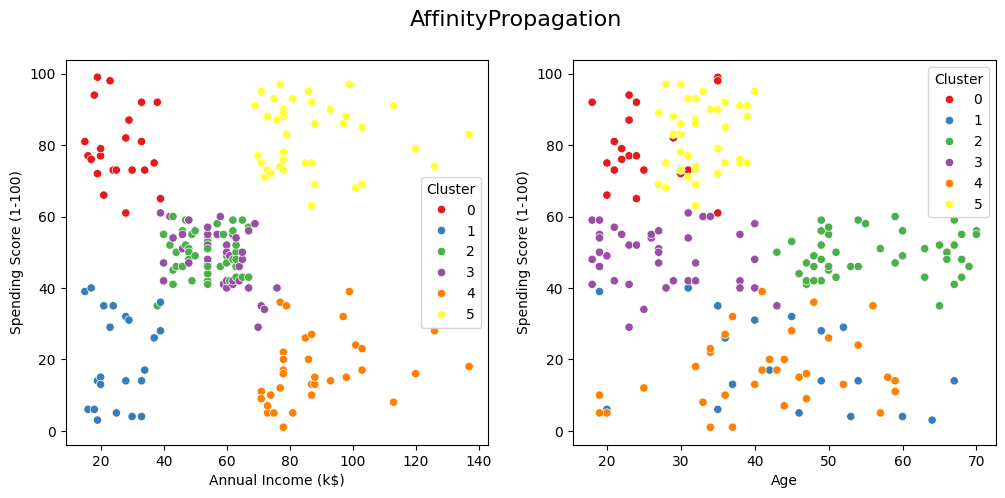

In [12]:
fig3, (ax_af) = plt.subplots(1, 2, figsize=(12, 5))
fig3.suptitle('AffinityPropagation', fontsize=16)
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=AF_clustered, hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=AF_clustered, hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')
plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

In [16]:
silhouette_af = silhouette_score(X_numerics, AF.labels_)
print('AffinityPropagation Silhouette Score: {:.4f}'.format(silhouette_af))

AffinityPropagation Silhouette Score: 0.4516


# K-Means

In [17]:
from sklearn.cluster import KMeans

In [18]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

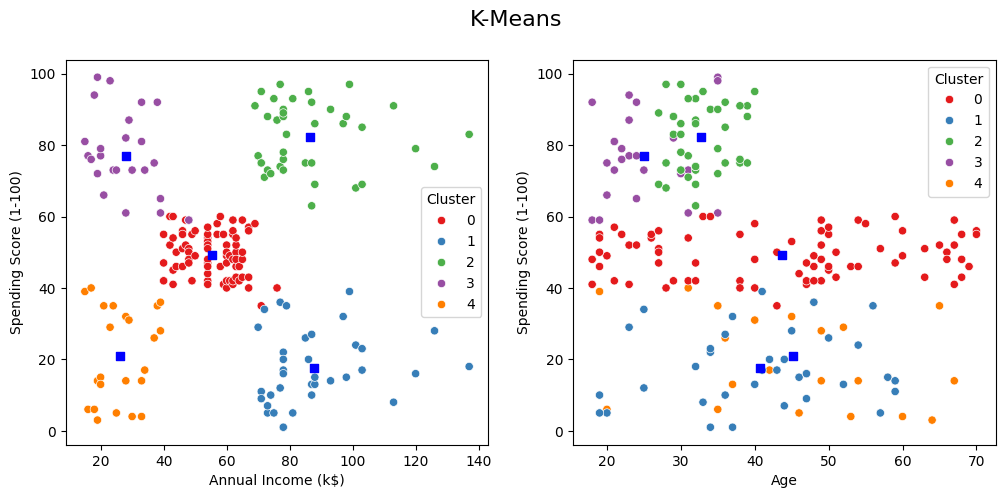

In [19]:
fig1, (axes) = plt.subplots(1, 2, figsize=(12, 5))
fig1.suptitle('K-Means', fontsize=16)
scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered, hue='Cluster', ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered, hue='Cluster', palette='Set1', ax=axes[1], legend='full')
axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")
plt.show()

In [20]:
silhouette_kmeans = silhouette_score(X_numerics, KM_5_clusters.labels_)
print('K-Means Silhouette Score: {:.4f}'.format(silhouette_kmeans))

K-Means Silhouette Score: 0.4405


# Висновки по дослідженню K-Means та порівняння з Affinity Propagation

### K-Means
- У цьому дослідженні використано алгоритм K-Means для кластеризації клієнтів на основі трьох ознак: **вік**, **річний дохід** та **Spending Score**.
- **Кількість кластерів**: 5, з ініціалізацією методом `k-means++`.
- **Silhouette Score (K-Means)**: 0.445 – це вказує на добре розділені кластери. Значення близьке до 0.5 свідчить про чітке розмежування між кластерами.

### Affinity Propagation
- У цьому ж наборі даних було використано алгоритм **Affinity Propagation** для автоматичного визначення кількості кластерів.
- **Кількість кластерів**: 6 кластерів, автоматично визначених алгоритмом.
- **Silhouette Score (Affinity Propagation)**: 0.4516 – це показник, близький до результату K-Means, вказує на добре розмежовані кластери.

### Порівняння результатів:
| Алгоритм                 | Кількість кластерів | Silhouette Score |
|--------------------------|---------------------|------------------|
| **K-Means**               | 5                   | 0.445            |
| **Affinity Propagation**  | 6                   | 0.4516           |

### Висновки:
1. **Affinity Propagation** показав трохи вищий результат у порівнянні з K-Means за **Silhouette Score** (**0.4516** проти **0.445**), що свідчить про незначно краще розмежування між кластерами.
2. **K-Means** також показав досить високий результат і може бути кращим варіантом, якщо заздалегідь відома кількість кластерів, яку ви хочете отримати.
3. **Affinity Propagation** дозволяє автоматично визначати кількість кластерів, що може бути корисним у ситуаціях, коли кількість кластерів невідома заздалегідь.
4. Обидва алгоритми показують досить близькі результати, але вибір між ними може залежати від ваших вимог до попереднього знання кількості кластерів або необхідності автоматичного виявлення кластерів.

Загалом, **Affinity Propagation** показав трохи кращий результат для цього набору даних, але **K-Means** залишається надійним варіантом із можливістю фіксації кількості кластерів.
